In [24]:
import pandas as pd
import numpy as np


In [25]:
df = pd.read_csv("netflix_reviews.csv")
df_sh = data.shape
df_index = data.columns

print(f"Shape of the dataset {df_sh}")
print(f"Columns in the dataset: {df_index}")

Shape of the dataset (117219, 8)
Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [47]:
df.head
# df.head = DataFrame 내의 처음과 마지막 n 줄의 데이터 출력

<bound method NDFrame.head of                                     reviewId           userName  \
0       411500b0-ac01-4071-badf-8aa8a45d0f29            Priya S   
1       5ef1c68e-9d84-4afb-8c58-829a554dc89b        angel dolla   
2       1fe7e31a-43d9-406e-94cd-549d019ec70f  CHRISTIAN SUMATRA   
3       c5cb0034-5395-417e-ad31-84c6ac79340b        Raghu Pathy   
4       43257f77-7b9e-40b8-ac56-c87ff3130619       Rebecka Todd   
...                                      ...                ...   
117214  a760ead9-e7aa-4ed1-a651-5c37c3600dac      A Google user   
117215  4957f9e7-d7f4-4a52-9764-031cebcac83f       Captain Jeoy   
117216  9acf7586-7abf-4b50-8c50-3ede3b2a42c4           Suryansh   
117217  32870f7f-c461-4256-b602-75244ca60248      A Google user   
117218  dc1352e9-10a8-41ca-ab23-05d045b08e90         suraj soni   

                                                  content  score  \
0       with basic plan netflix can consider to allow ...      2   
1                            

In [46]:
df.head()
df.head(-1)
# 표 형식으로 DataFrame 내의 처음과 마지막 5줄의 데이터 출력

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,411500b0-ac01-4071-badf-8aa8a45d0f29,Priya S,with basic plan netflix can consider to allow ...,2,0,8.137.0 build 4 50942,2024-10-22 14:16:52,8.137.0 build 4 50942
1,5ef1c68e-9d84-4afb-8c58-829a554dc89b,angel dolla,good app for series,5,0,8.137.0 build 4 50942,2024-10-22 14:04:30,8.137.0 build 4 50942
2,1fe7e31a-43d9-406e-94cd-549d019ec70f,CHRISTIAN SUMATRA,laging wala mga movies na magaganda potangina ...,1,0,8.136.0 build 3 50908,2024-10-22 14:02:38,8.136.0 build 3 50908
3,c5cb0034-5395-417e-ad31-84c6ac79340b,Raghu Pathy,this app uses more data and its asking without...,1,0,8.136.0 build 3 50908,2024-10-22 13:57:12,8.136.0 build 3 50908
4,43257f77-7b9e-40b8-ac56-c87ff3130619,Rebecka Todd,since the latest update i am not able to load ...,1,0,8.136.0 build 3 50908,2024-10-22 13:48:29,8.136.0 build 3 50908
...,...,...,...,...,...,...,...,...
117213,cbb04dd9-1a1d-46df-80a4-8ae987fe5d85,Ciaran Worthington,everytime i watch a show it goes so dark so i ...,1,0,7.48.0 build 10 34747,2020-08-22 14:58:10,7.48.0 build 10 34747
117214,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it there are so many movies and ...,5,0,NaN,2019-08-03 15:06:03,NaN
117215,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,i love netflix i always enjoy my time using it,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117216,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN


In [48]:
# 1. 이것을 데이터 프레임에 적용 시키는 방법을 모르겟음 
# apply와 lambda함수를 사용하여 적용(lambda 함수의 활용법을 더 알아봐야할듯)
# lambda는 임의의 함수, 맵핑 등에 사용 가능함(지금 알고있는 방식이 2가지) 

import re

def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

df['content'] = df['content'].apply(lambda x: preprocess_text(x))

# . : 임의의 한 문자 (줄바꿈 문자는 제외)
# \w : 알파벳 문자, 숫자, 언더스코어 ([a-zA-Z0-9_])
# \W : 문자, 숫자, 언더스코어가 아닌 모든 것
# \d : 숫자 ([0-9])
# \D : 숫자가 아닌 것
# \s : 공백 문자 (스페이스, 탭, 줄바꿈)
# \S : 공백이 아닌 문자
# w랑 s는 묶어서 사용했는데 왜 d+는 따로 사용했는지

# * : 0번 이상 반복
# + : 1번 이상 반복
# ? : 0번 또는 1번
# {n} : 정확히 n번 반복
# {n,} : n번 이상 반복
# {n,m} : 최소 n번, 최대 m번 반복
    
# ^ : 문자열의 시작
# $ : 문자열의 끝
# \b : 단어의 경계
# \B : 단어 경계가 아님

In [50]:
df_drop = df.dropna()

In [51]:
print(df['content'])

0         with basic plan netflix can consider to allow ...
1                                       good app for series
2         laging wala mga movies na magaganda potangina ...
3         this app uses more data and its asking without...
4         since the latest update i am not able to load ...
                                ...                        
117214    i really like it there are so many movies and ...
117215       i love netflix i always enjoy my time using it
117216                 sound quality is very slow of movies
117217    rate is very expensive bcos we see netflix sun...
117218    this app is awesome for english movies series ...
Name: content, Length: 117219, dtype: object


In [88]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,411500b0-ac01-4071-badf-8aa8a45d0f29,Priya S,with basic plan netflix can consider to allow ...,2,0,8.137.0 build 4 50942,2024-10-22 14:16:52,8.137.0 build 4 50942
1,5ef1c68e-9d84-4afb-8c58-829a554dc89b,angel dolla,good app for series,5,0,8.137.0 build 4 50942,2024-10-22 14:04:30,8.137.0 build 4 50942
2,1fe7e31a-43d9-406e-94cd-549d019ec70f,CHRISTIAN SUMATRA,laging wala mga movies na magaganda potangina ...,1,0,8.136.0 build 3 50908,2024-10-22 14:02:38,8.136.0 build 3 50908
3,c5cb0034-5395-417e-ad31-84c6ac79340b,Raghu Pathy,this app uses more data and its asking without...,1,0,8.136.0 build 3 50908,2024-10-22 13:57:12,8.136.0 build 3 50908
4,43257f77-7b9e-40b8-ac56-c87ff3130619,Rebecka Todd,since the latest update i am not able to load ...,1,0,8.136.0 build 3 50908,2024-10-22 13:48:29,8.136.0 build 3 50908


In [ ]:
오류코드입니다. 실행시키지 마세요

# 1차 시도 NameError
Score = count(df)
Count = df['score']

# 2차 시도 NameError
Score = df['score'].counts()

# 3차 시도 (리스트에서 숫자가 몇개씩 들어가있는지 확인하는 방법 검색)
Score_count = Counter(df['score'])

# 4차시도 (정상작동)
Score_count = df['score'].value_counts()


plt.figure(figsize=(10, 7))
# 1차 시도: 참고 그래프와 달리 x축 값이 너무 크게 나오고 점수 순서가 아닌 데이터 양 순서로 나옴
sns.barplot(x=Score_count, y=Score_count)

# 2차 시도(그래프에 바가 1개 나옴)
sns.barplot(x=Score_count.keys, y=Score_count.values)

# 3차 시도 (1찰 시도와 같은 값이 출력 됨)
sns.barplot(x=Score_count, y=Score_count.values)

# 4차 시도 (바 1개인 그래프인데 이상하게 나옴)
sns.barplot(x=Score_count.keys, y=Score_count)

# 5차 시도 (x축에 score_count의 index값을 넣음)
sns.barplot(x=score_count.index, y=score_count.values)

plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_6000\2863573525.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index, y=score_counts.values, palette='viridis')


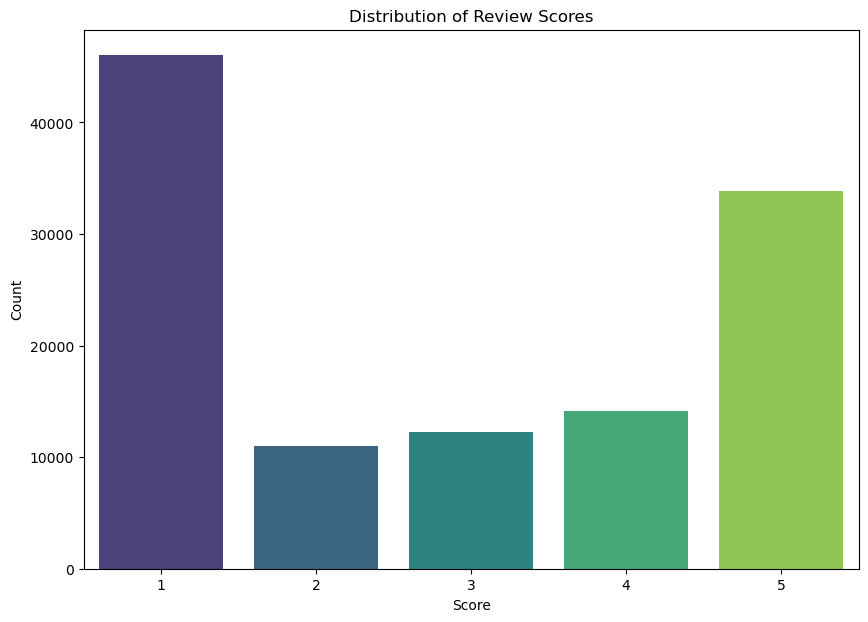

In [89]:
# 2. x축에 1~5 점을 표시하는 방법과 정렬방법을 모르겟음 
# x축에 넣으려는 값의 index를 설정해 주어야한다.

import seaborn as sns  # 시각화 라이브러리
import matplotlib.pyplot as plt  # 그래프 표시 라이브러리

# 리뷰 점수 빈도 계산
score_counts = df['score'].value_counts()

# 그래프 만들기
plt.figure(figsize=(10, 7))
# 색상 넣기는 강의 자료에서 찾았습니다. palette = 'viridis'
# X축에 점수, Y축에 해당 점수의 개수
sns.barplot(x=score_counts.index, y=score_counts.values, palette='viridis')  
plt.xlabel('Score')  # X축 레이블
plt.ylabel('Count')  # Y축 레이블
plt.title('Distribution of Review Scores')  # 그래프 제목
plt.show()

In [1]:
# 참고자료와 강의자료를 보면서 비교를 해보았는데
# 다른 종류의 분석이라서 참고자료대로 작성 중
# 강의 자료(시계열 데이터 예측): nn.LSTM(input_size, hidden_size, batch_first)는 입력크기, 은닉상태, 배치 차원을 첫 번째로 설정
# 3. rating, text_pipeline, lable_pipline 은 어떤 역할인지 리뷰 데이터 셋에는 존재하지 않는 부분인데 그대로 사용해도 되는지
# 4. LSTM모델 정의 init부분 vocab_size, embed_dim, hidden_dim, output_dim은 어떤 역할이며 임의로 적는건지 있는 함수를 사용한건지



import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

reviews = df['content'].fillna('')  # 리뷰가 없는 경우 공백으로 대체
ratings = df['score']

# 토크나이저 및 어휘 집합 생성
tokenizer = get_tokenizer("basic_english")

def yield_tokens(df_iter):
    for text in df_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_reviews), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

# 텍스트 파이프라인: 텍스트 -> 토큰 -> 인덱스
def text_pipeline(x):
    return [vocab[token] for token in tokenizer(x)]

# 레이블 파이프라인: 점수(1-5)를 0부터 시작하는 인덱스로 변환
label_encoder = LabelEncoder()
train_ratings_encoded = label_encoder.fit_transform(train_ratings)
test_ratings_encoded = label_encoder.transform(test_ratings)
    
class ReviewDataset(df):
    # 초기화 메서드
    def __init__(self, reviews, ratings, text_pipeline, lable_pipeline):
        # 각 데이터를 변수로 저장
        self.reviews = reviews
        self.ratings = ratings
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline
        
    # 데이터 셋의 크기 반환
    def __len__(self):
        return len(self.reviews)
    
    # 인덱스를 사용해 특정 데이터 항목 가져오기
    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        # 리뷰와 점수 텐서로 변환
        return torch.tensor(review), torch.tensor(rating)
    
# 데이터 셋 정의
train_dataset = ReviewDataset(train_reviews, train_ratings, text_pipeline, label_pipeline)
test_dataset = ReviewDataset(test_reviews, test_ratings, text_pipeline, label_pipeline)

# 데이터 로더 정의
BATCH_SIZE = 64

# LSTM모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        # super()은 부모 클래스의 메서드나 속성을 호출
        # nn.Module의 초기화 메서드를 호출해 초기화 수행
        super(LSTMModel, self).__init__()
        # 임베딩을 진행하는 이유: 단어를 고차원 공간에서의 실수 벡터로 변환
        # 모델이 텍스트의 의미를 이해하게 만든다.
        # sparse=True는 희소 인베딩을 활성화 한다.
        # 임베딩 레이어가 메모리 효율적으로 작동하게 만들며, 단어 인덱스 만을 사용하게 만든다.
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        # LSTM 정의
        # 시퀀스 데이터를 처리 역할
        # LSTM은 장기 의존성 학습으로 문맥의 정보를 잘 기억
        # 텍스트 시퀀스는 시간적으로 의존성을 가지므로 LSTM을 통해 정보를 효과적으로 학습
        # batch_first=True는 입력텐서의 첫 번째 차원이 배치 크기로 만든다.
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    # 모델의 순전파 정의
    # text는 모델에 입력 되는 텍스트 데이터
    # 순전파란? 입력 데이터가 모델을 통해 전달되어 최종 출력이 생성 되는 과정 의미
    # 출력 레이어에서 예측값이 생성된다.
    def forward(self, text):
        embedded = self.embedding(text)
        # unsqueeze(0)는 입력 텐서에 배치차원을 추가하는 방법
        # 왜 추가하는지? LSTM은 일반적으로 (배치 크기, 시퀀스 길이, 특성 수)의 형태를 가진 텐서를 입력받는데
        # embedded 텐서가 (시퀀스 길이, 특성 수)의 형태일 경우, unsqueeze(0)을 사용하여 (1, 시퀀스 길이, 특성 수)의 형태로 변환해 LSTM에 맞춘다.  
        output, (hidden, cell) = self.lstm(embedded.unsqueeze(0))
        # hidden[-1]은 모든 숨겨진 상태의 텐서에서 마지막에 숨겨진 상태를 의미
        return self.fc(hidden[-1])







C:\Users\USER\anaconda3\Lib\site-packages\torchtext\__init__.py:7: SyntaxWarning: invalid escape sequence '\ '
  "\n/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ \n"


OSError: [WinError 127] 지정된 프로시저를 찾을 수 없습니다

In [79]:
print(df['content'])

0         With basic plan, Netflix can consider to allow...
1                                      Good app for series.
2         Laging wala mga movies na magaganda potangina ...
3         This app uses more data and it's asking withou...
4         Since the latest update i am not able to load ...
                                ...                        
117214    i really like it! there are so many movies and...
117215     I love Netflix. I always enjoy my time using it.
117216                 Sound quality is very slow of movies
117217    Rate is very expensive.. bcos we see netflix s...
117218    this app is awesome for english movies ,series...
Name: content, Length: 117219, dtype: object
